In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
for year in range(2015,2020):
    df = pd.read_csv(f'/Users/haoling/Documents/GitHub/ds-class-intro/pandas_intro/data/world-happiness/{year}.csv')
    print(year,len(df.columns),df.columns)

2015 12 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 13 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 12 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 9 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Health

In [4]:
rename_dict = {'Overall rank':'Rank',
               'Happiness Rank':'Rank',
               'Happiness.Rank':'Rank',
               'Happiness Score':'Score',
               'Happiness.Score':'Score',
               'Country or region':'Country',
               'Economy..GDP.per.Capita.':'GDP_PC',
               'GDP per capita':'GDP_PC',
               'Economy (GDP per Capita)':'GDP_PC',
               'Social support':'Family',
               'Health (Life Expectancy)':'Health',
               'Healthy life expectancy':'Health',
               'Health..Life.Expectancy.':'Health',
               'Freedom to make life choices':'Freedom',
               'Trust (Government Corruption)':'Trust',
               'Trust..Government.Corruption.':'Trust',
               'Perceptions of corruption':'Trust',
               'Dystopia Residual':'Dystopia',
               'Dystopia.Residual':'Dystopia'
              }

In [5]:
# read in all different years of data
df_list = []

for year in range(2015, 2020):
    df = pd.read_csv(f'data/world-happiness/{year}.csv')
    df.rename(columns=rename_dict, inplace=True)
    df['year'] = int(year)
    df_list.append(df)

In [6]:
df_all = pd.concat(df_list)
df_all.sort_values(['Country','year'],inplace=True)
df_all.groupby('year')['Country'].count()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


year
2015    158
2016    157
2017    155
2018    156
2019    156
Name: Country, dtype: int64

In [7]:
year_availability = df_all.groupby(['Country','year'])['Country'].size().unstack()
year_availability[year_availability.isnull().any(axis=1)]

year,2015,2016,2017,2018,2019
Country,,,,,
Angola,1.0,1.0,1.0,1.0,NaN
Belize,NaN,1.0,1.0,1.0,NaN
Central African Republic,1.0,NaN,1.0,1.0,1.0
Comoros,1.0,1.0,NaN,NaN,1.0
Djibouti,1.0,NaN,NaN,NaN,NaN
Gambia,NaN,NaN,NaN,NaN,1.0
Hong Kong,1.0,1.0,NaN,1.0,1.0
"Hong Kong S.A.R., China",NaN,NaN,1.0,NaN,NaN
Laos,1.0,1.0,NaN,1.0,1.0


In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 152 to 145
Data columns (total 17 columns):
Country                      782 non-null object
Dystopia                     470 non-null float64
Family                       782 non-null float64
Freedom                      782 non-null float64
GDP_PC                       782 non-null float64
Generosity                   782 non-null float64
Health                       782 non-null float64
Lower Confidence Interval    157 non-null float64
Rank                         782 non-null int64
Region                       315 non-null object
Score                        782 non-null float64
Standard Error               158 non-null float64
Trust                        781 non-null float64
Upper Confidence Interval    157 non-null float64
Whisker.high                 155 non-null float64
Whisker.low                  155 non-null float64
year                         782 non-null int64
dtypes: float64(13), int64(2), object(2)
memory u

In [9]:
df_all.isna().mean()

Country                      0.000000
Dystopia                     0.398977
Family                       0.000000
Freedom                      0.000000
GDP_PC                       0.000000
Generosity                   0.000000
Health                       0.000000
Lower Confidence Interval    0.799233
Rank                         0.000000
Region                       0.597187
Score                        0.000000
Standard Error               0.797954
Trust                        0.001279
Upper Confidence Interval    0.799233
Whisker.high                 0.801790
Whisker.low                  0.801790
year                         0.000000
dtype: float64

In [10]:
df_all.head(10)

,Country,Dystopia,Family,Freedom,GDP_PC,Generosity,Health,Lower Confidence Interval,Rank,Region,Score,Standard Error,Trust,Upper Confidence Interval,Whisker.high,Whisker.low,year
152,Afghanistan,1.952100,0.302850,0.234140,0.319820,0.365100,0.303350,NaN,153,Southern Asia,3.575,0.03084,0.097190,NaN,NaN,NaN,2015
153,Afghanistan,2.145580,0.110370,0.164300,0.382270,0.312680,0.173440,3.288,154,Southern Asia,3.360,NaN,0.071120,3.432,NaN,NaN,2016
140,Afghanistan,2.150801,0.581543,0.106180,0.401477,0.311871,0.180747,NaN,141,NaN,3.794,NaN,0.061158,NaN,3.873661,3.714338,2017
144,Afghanistan,NaN,0.537000,0.085000,0.332000,0.191000,0.255000,NaN,145,NaN,3.632,NaN,0.036000,NaN,NaN,NaN,2018
153,Afghanistan,NaN,0.517000,0.000000,0.350000,0.158000,0.361000,NaN,154,NaN,3.203,NaN,0.025000,NaN,NaN,NaN,2019
94,Albania,1.898940,0.804340,0.357330,0.878670,0.142720,0.813250,NaN,95,Central and Eastern Europe,4.959,0.05013,0.064130,NaN,NaN,NaN,2015
108,Albania,1.928160,0.501630,0.318660,0.955300,0.168400,0.730070,4.546,109,Central and Eastern Europe,4.655,NaN,0.053010,4.764,NaN,NaN,2016
108,Albania,1.490442,0.803685,0.381499,0.996193,0.201313,0.731160,NaN,109,NaN,4.644,NaN,0.039864,NaN,4.752464,4.535536,2017
111,Albania,NaN,0.817000,0.419000,0.916000,0.149000,0.790000,NaN,112,NaN,4.586,NaN,0.032000,NaN,NaN,NaN,2018
106,Albania,NaN,0.848000,0.383000,0.947000,0.178000,0.874000,NaN,107,NaN,4.719,NaN,0.027000,NaN,NaN,NaN,2019


In [11]:
df_2015 = pd.read_csv('data/world-happiness/2015.csv')
df_2016 = pd.read_csv('data/world-happiness/2016.csv')

In [12]:
region_2015 = dict(zip(df_2015['Country'], df_2015['Region']))
region_2016 = dict(zip(df_2016['Country'], df_2016['Region']))

region = {**region_2015, **region_2016}

In [13]:
# alternative way to combine dicts
region_dict2 = region_2015.copy()
region_dict2.update(region_2016)
region == region_dict2

True

In [14]:
# fill regions based on country
df_all['Region'] = df_all['Country'].map(region)

In [15]:
df_all[df_all['Region'].isna()]

,Country,Dystopia,Family,Freedom,GDP_PC,Generosity,Health,Lower Confidence Interval,Rank,Region,Score,Standard Error,Trust,Upper Confidence Interval,Whisker.high,Whisker.low,year
119,Gambia,NaN,0.939000,0.382000,0.308000,0.269000,0.428000,NaN,120,NaN,4.516,NaN,0.167000,NaN,NaN,NaN,2019
70,"Hong Kong S.A.R., China",0.554633,1.262791,0.490969,1.551675,0.374466,0.943062,NaN,71,NaN,5.472,NaN,0.293934,NaN,5.549594,5.394406,2017
83,North Macedonia,NaN,1.294000,0.345000,0.983000,0.185000,0.838000,NaN,84,NaN,5.274,NaN,0.034000,NaN,NaN,NaN,2019
57,Northern Cyprus,NaN,1.211000,0.495000,1.229000,0.179000,0.909000,NaN,58,NaN,5.835,NaN,0.154000,NaN,NaN,NaN,2018
63,Northern Cyprus,NaN,1.252000,0.417000,1.263000,0.191000,1.042000,NaN,64,NaN,5.718,NaN,0.162000,NaN,NaN,NaN,2019
32,Taiwan Province of China,2.126607,1.384565,0.361467,1.433627,0.258360,0.793984,NaN,33,NaN,6.422,NaN,0.063829,NaN,6.494596,6.349404,2017
37,Trinidad & Tobago,NaN,1.492000,0.575000,1.223000,0.171000,0.564000,NaN,38,NaN,6.192,NaN,0.019000,NaN,NaN,NaN,2018
38,Trinidad & Tobago,NaN,1.477000,0.489000,1.231000,0.185000,0.713000,NaN,39,NaN,6.192,NaN,0.016000,NaN,NaN,NaN,2019


In [16]:
df_all['Region'].value_counts()

Sub-Saharan Africa                 195
Central and Eastern Europe         144
Latin America and Caribbean        109
Western Europe                     103
Middle East and Northern Africa     96
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        28
North America                       10
Australia and New Zealand           10
Name: Region, dtype: int64

In [17]:
cols_to_keep = ['Country', 'Region', 'year', 
                'Rank', 'Score', 'GDP_PC', 'Family', 'Health',
                'Freedom', 'Trust', 'Generosity', 'Dystopia']
df_all_final = df_all[cols_to_keep].copy()
df_all_final.columns = df_all_final.columns.str.lower()
df_all_final.to_csv('data/world-happiness/combined.csv', index=False)

In [18]:
# take some sample data for inspection
df_all_final[df_all_final['country'].isin(['China','United States'])]

,country,region,year,rank,score,gdp_pc,family,health,freedom,trust,generosity,dystopia
83,China,Eastern Asia,2015,84,5.140,0.890120,0.946750,0.816580,0.516970,0.027810,0.081850,1.860400
82,China,Eastern Asia,2016,83,5.245,1.027800,0.793810,0.735610,0.440120,0.027450,0.049590,2.170870
78,China,Eastern Asia,2017,79,5.273,1.081166,1.160837,0.741416,0.472788,0.022794,0.028807,1.764939
85,China,Eastern Asia,2018,86,5.246,0.989000,1.142000,0.799000,0.597000,0.103000,0.029000,NaN
92,China,Eastern Asia,2019,93,5.191,1.029000,1.125000,0.893000,0.521000,0.100000,0.058000,NaN
14,United States,North America,2015,15,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2.510110
12,United States,North America,2016,13,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2.727820
13,United States,North America,2017,14,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.218113
17,United States,North America,2018,18,6.886,1.398000,1.471000,0.819000,0.547000,0.133000,0.291000,NaN
18,United States,North America,2019,19,6.892,1.433000,1.457000,0.874000,0.454000,0.128000,0.280000,NaN


In [19]:
features = ['gdp_pc','family','health','freedom','generosity','trust']
targets = ['score']

df_2019 = df_all_final[df_all_final['year']==2019].copy()

In [20]:
df_2019[df_2019['region'].isna()]

,country,region,year,rank,score,gdp_pc,family,health,freedom,trust,generosity,dystopia
119,Gambia,NaN,2019,120,4.516,0.308,0.939,0.428,0.382,0.167,0.269,NaN
83,North Macedonia,NaN,2019,84,5.274,0.983,1.294,0.838,0.345,0.034,0.185,NaN
63,Northern Cyprus,NaN,2019,64,5.718,1.263,1.252,1.042,0.417,0.162,0.191,NaN
38,Trinidad & Tobago,NaN,2019,39,6.192,1.231,1.477,0.713,0.489,0.016,0.185,NaN


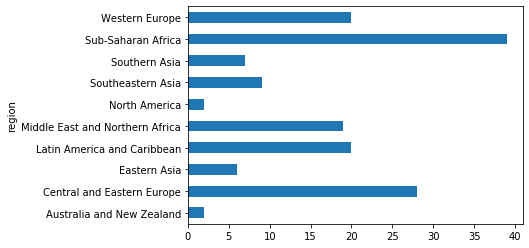

In [21]:
df_2019.groupby('region')['country'].count().plot(kind='barh')

In [22]:
df_2019.groupby('region')[features+targets].describe().T

region            Australia and New Zealand  Central and Eastern Europe  \
gdp_pc     count                   2.000000                   28.000000   
           mean                    1.337500                    1.022429   
           std                     0.048790                    0.216054   
           min                     1.303000                    0.493000   
           25%                     1.320250                    0.885000   
           50%                     1.337500                    1.059500   
           75%                     1.354750                    1.190500   
           max                     1.372000                    1.269000   
family     count                   2.000000                   28.000000   
           mean                    1.552500                    1.340393   
           std                     0.006364                    0.217088   
           min                     1.548000                    0.666000   
           25%                     1.550250                    1.232000   
           50%                     1.552500                    1.424000   
           75%                     1.554750                    1.505000   
           max                     1.557000                    1.538000   
health     count                   2.000000                   28.000000   
           mean                    1.031000                    0.808500   
           std                     0.007071                    0.072981   
           min                     1.026000                    0.657000   
           25%                     1.028500                    0.748750   
           50%                     1.031000                    0.815000   
           75%                     1.033500                    0.871750   
           max                     1.036000                    0.953000   
freedom    count                   2.000000                   28.000000   
           mean                    0.571000                    0.357964   
           std                     0.019799                    0.118971   
           min                     0.557000                    0.178000   
           25%                     0.564000                    0.277500   
           50%                     0.571000                    0.340000   
           75%                     0.578000                    0.458250   
           max                     0.585000                    0.631000   
generosity count                   2.000000                   28.000000   
           mean                    0.331000                    0.141214   
           std                     0.001414                    0.080813   
           min                     0.330000                    0.035000   
           25%                     0.330500                    0.081750   
           50%                     0.331000                    0.120000   
           75%                     0.331500                    0.182500   
           max                     0.332000                    0.322000   
trust      count                   2.000000                   28.000000   
           mean                    0.335000                    0.062750   
           std                     0.063640                    0.064585   
           min                     0.290000                    0.000000   
           25%                     0.312500                    0.018500   
           50%                     0.335000                    0.037500   
           75%                     0.357500                    0.084000   
           max                     0.380000                    0.240000   
score      count                   2.000000                   28.000000   
           mean                    7.267500                    5.571786   
           std                     0.055861                    0.591289   
           min                     7.228000                    4.332000   
           25%           

In [23]:
df_means = df_2019.groupby('region')[features+targets].mean()
df_means

,gdp_pc,family,health,freedom,generosity,trust,score
region,,,,,,,
Australia and New Zealand,1.337500,1.552500,1.031000,0.571000,0.331000,0.335000,7.267500
Central and Eastern Europe,1.022429,1.340393,0.808500,0.357964,0.141214,0.062750,5.571786
Eastern Asia,1.235167,1.333500,0.953333,0.372167,0.172833,0.119667,5.688833
Latin America and Caribbean,0.908950,1.332850,0.816800,0.438500,0.142600,0.074850,5.942550
Middle East and Northern Africa,1.059053,1.148684,0.751053,0.317947,0.153474,0.105000,5.237000
North America,1.399000,1.481000,0.956500,0.519000,0.282500,0.218000,7.085000
Southeastern Asia,0.930000,1.246444,0.745333,0.543778,0.301778,0.123444,5.273667
Southern Asia,0.650286,0.986857,0.617000,0.386286,0.234714,0.093429,4.526857
Sub-Saharan Africa,0.447231,0.916103,0.407026,0.336205,0.185641,0.092641,4.294513


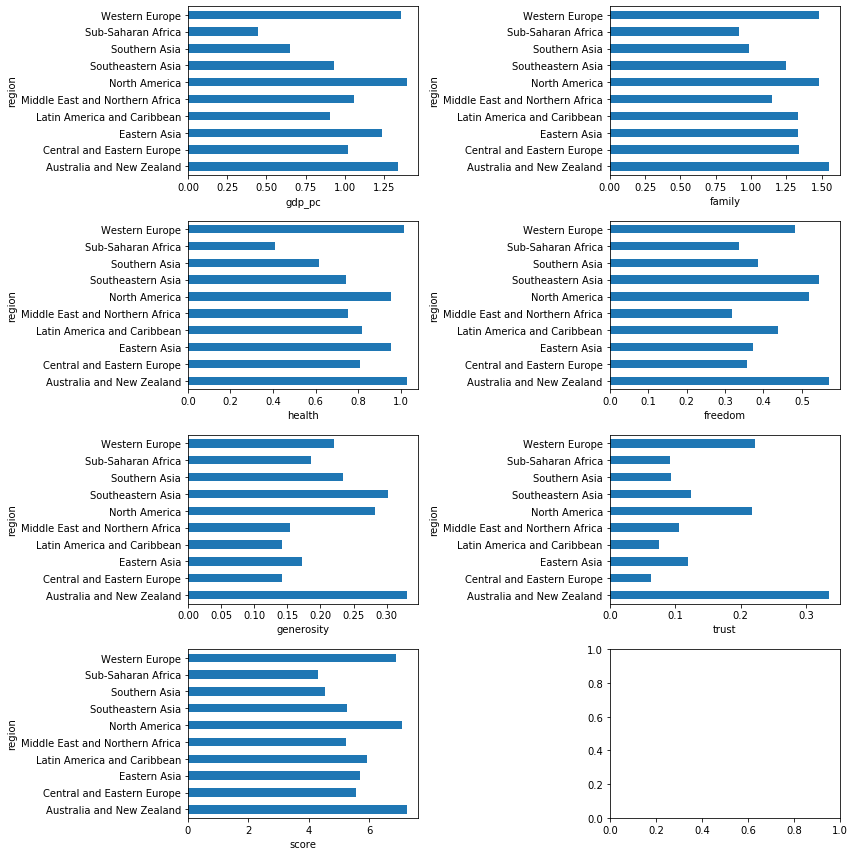

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(12,12))
for i, ax in enumerate(axs.flat):
    try:
        df_means.loc[:, df_means.columns[i]].plot(kind='barh', ax=ax)
        ax.set(xlabel=df_means.columns[i])
    except:
        pass
fig.tight_layout()

[Text(0, 0, 'Southern Asia'),
 Text(0, 0, 'Central and Eastern Europe'),
 Text(0, 0, 'Middle East and Northern Africa'),
 Text(0, 0, 'Latin America and Caribbean'),
 Text(0, 0, 'Australia and New Zealand'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Southeastern Asia'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Eastern Asia')]

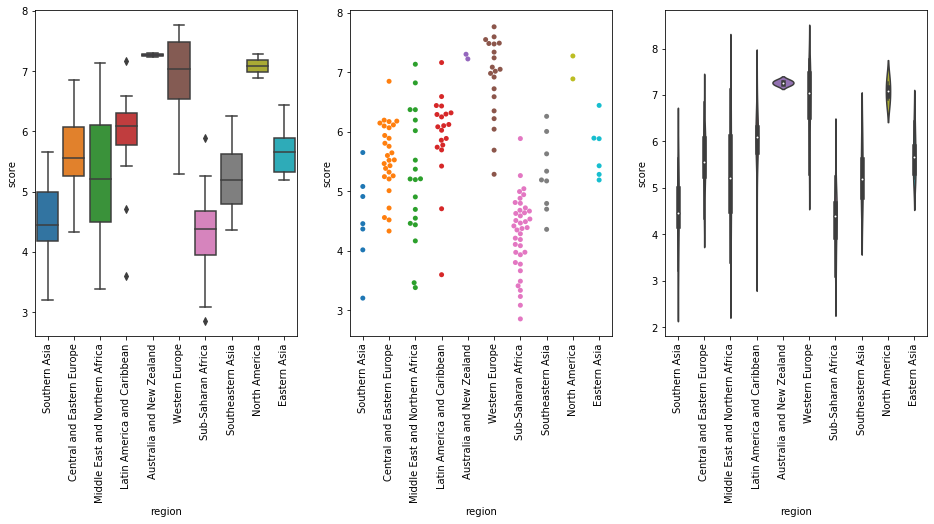

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(16,6))

ax = sns.boxplot(x="region", y="score", data=df_2019, ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.swarmplot(x="region", y="score", data=df_2019, ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.violinplot(x="region", y="score", data=df_2019, ax=axes[2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

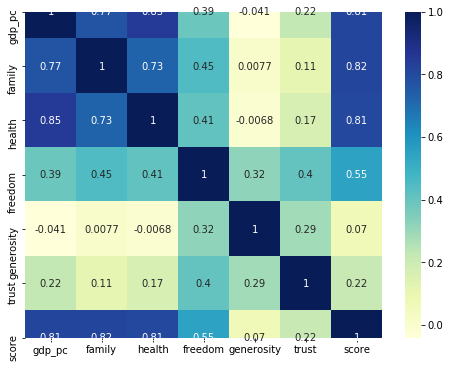

In [26]:
#corr 
spearman_cormatrix = df_2019[features+targets].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_cormatrix, annot=True, cmap="YlGnBu")

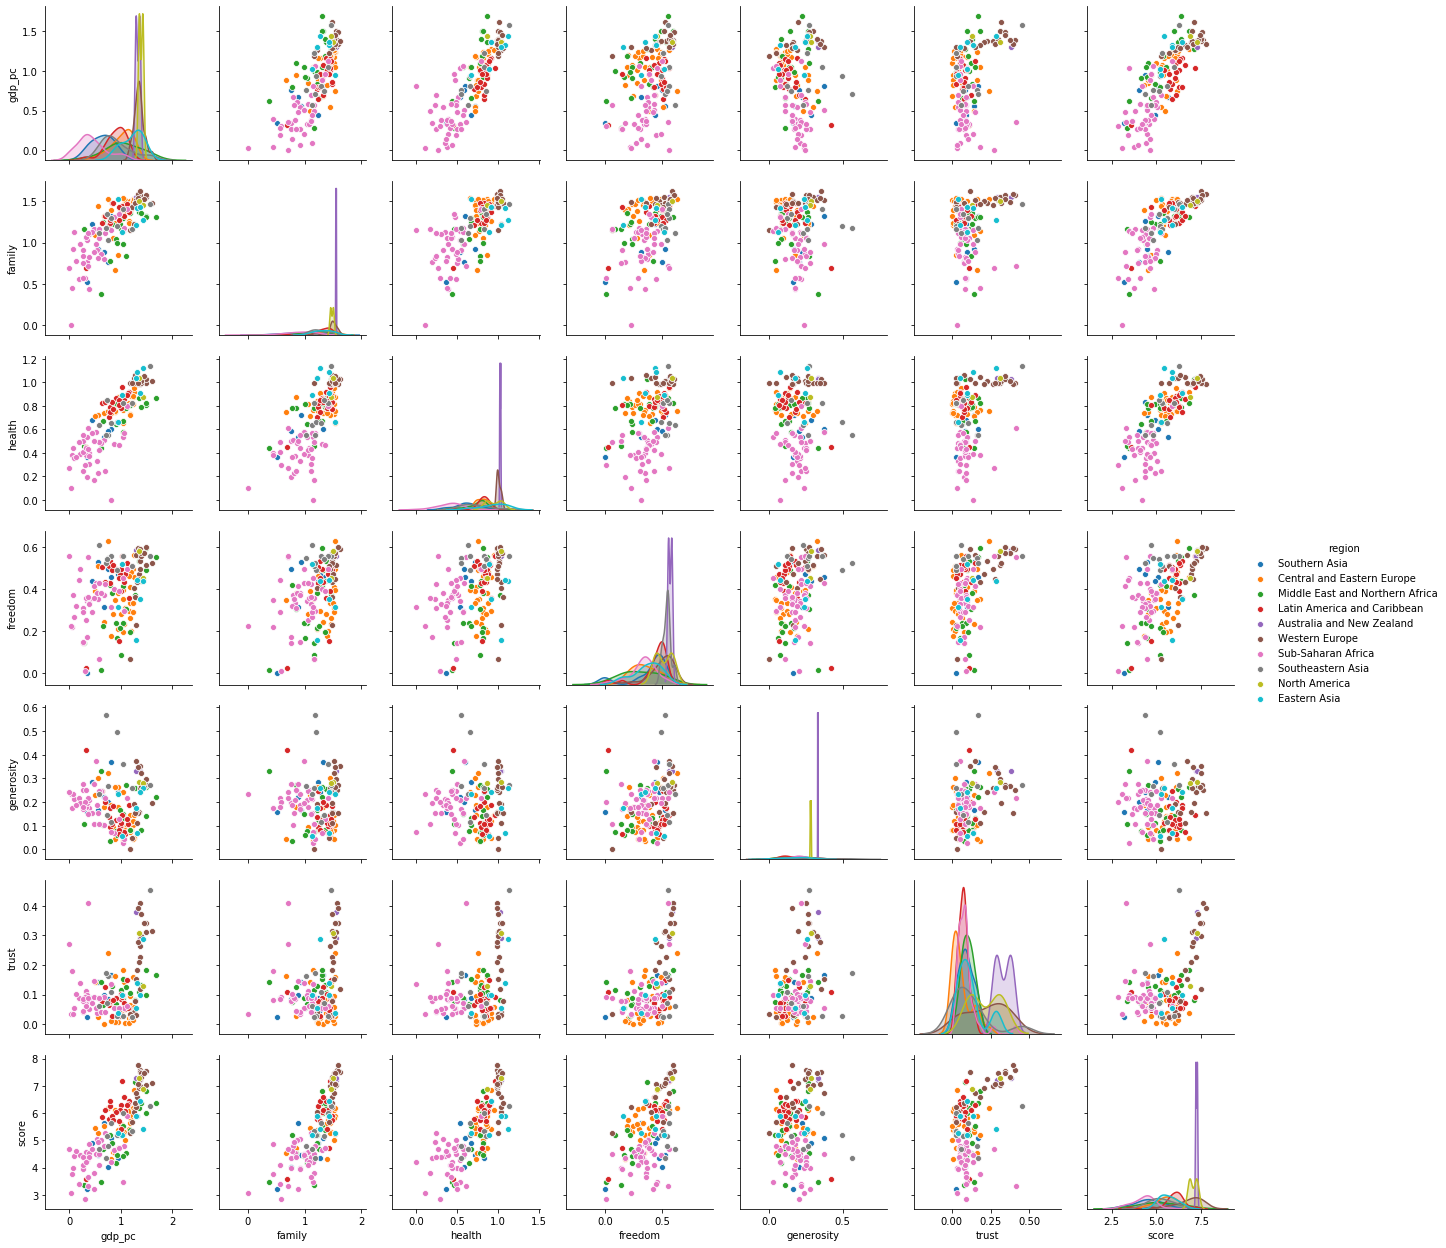

In [27]:
sns.pairplot(df_2019[features+targets+['region']], hue='region')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


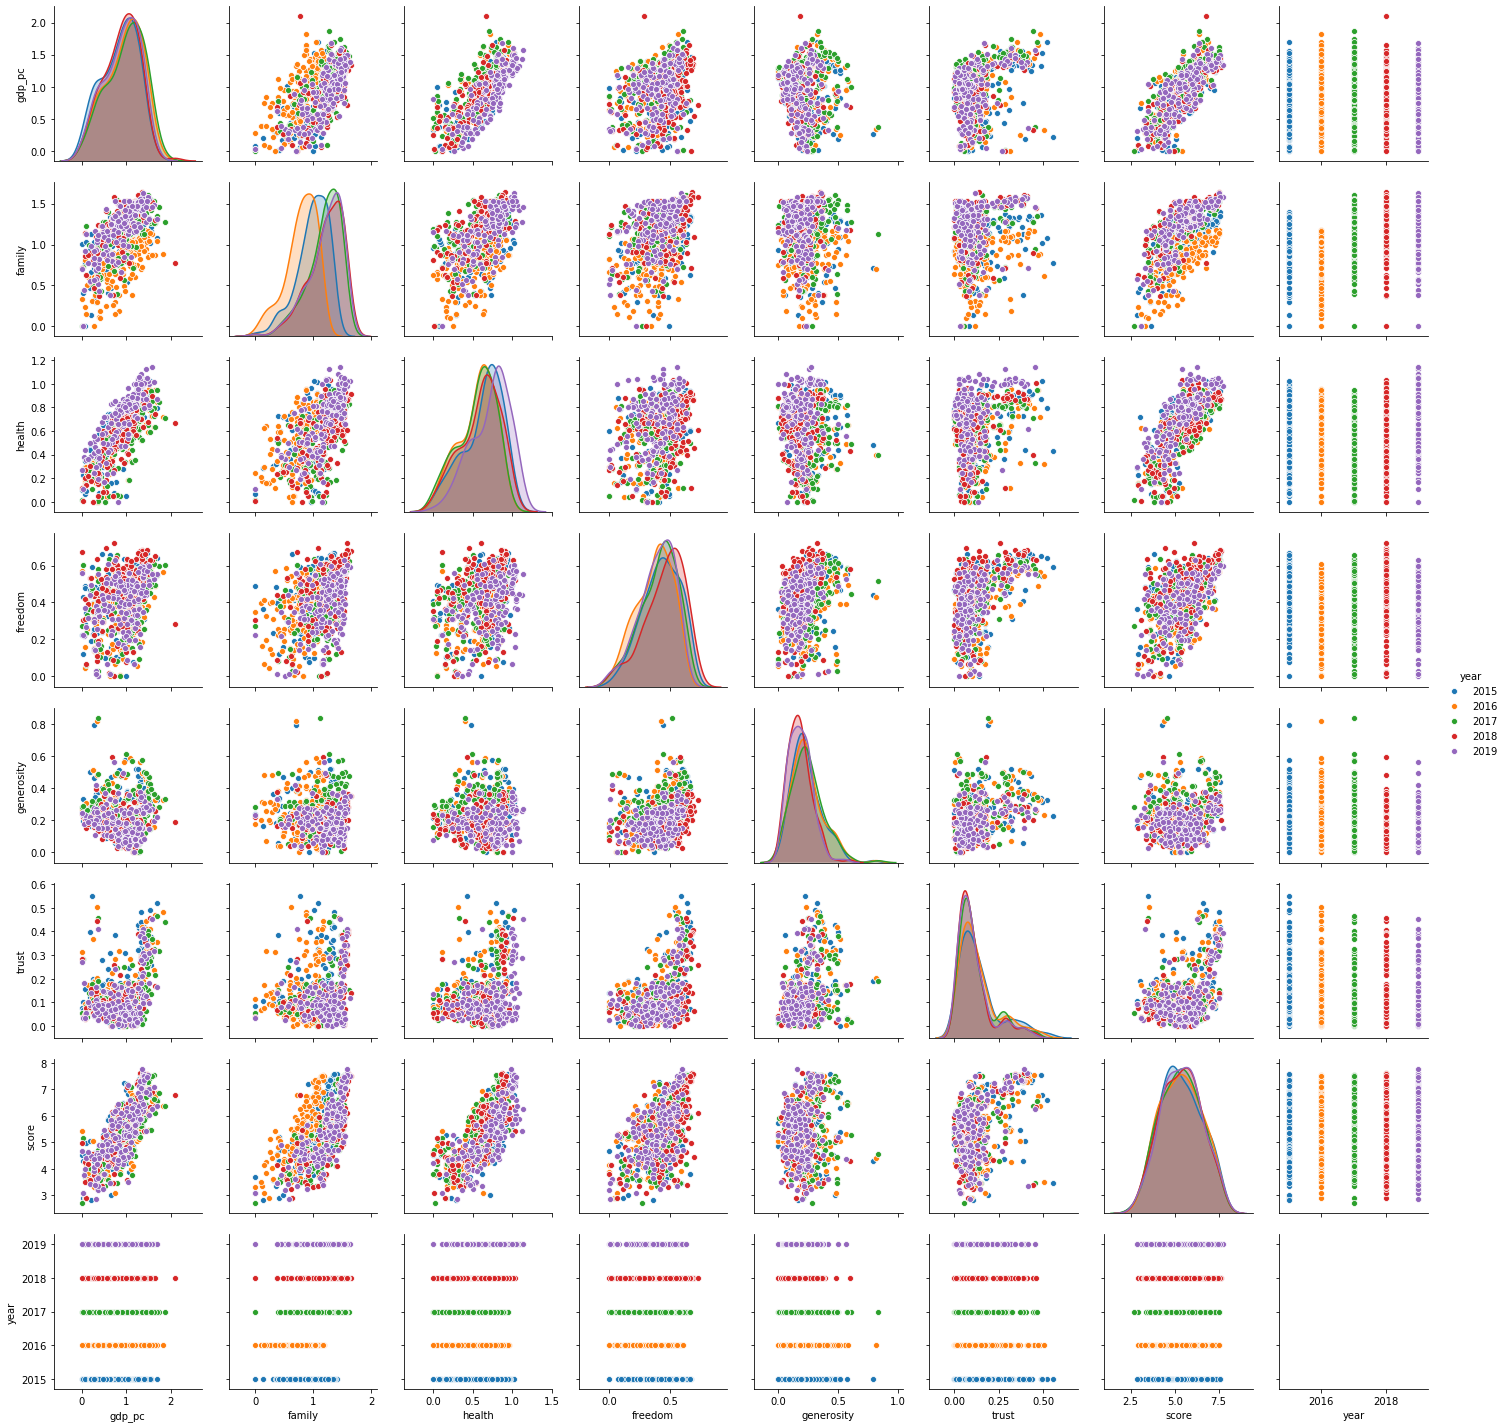

In [28]:
sns.pairplot(df_all_final[features+targets+['year']], hue='year')

# Qeustion: Which country changed the most in ranking in the past five years?

Country that dropped the most in happiness ranking: Venezuela, changed by -85
Country that increased the most in happiness ranking: Benin, changed by 53


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  2.,  2.,
         4., 13., 11., 16., 12., 36., 15., 13., 12.,  9.,  5.,  0.,  4.,
         8.,  1.,  1.,  2.]),
 array([-85. , -80.4, -75.8, -71.2, -66.6, -62. , -57.4, -52.8, -48.2,
        -43.6, -39. , -34.4, -29.8, -25.2, -20.6, -16. , -11.4,  -6.8,
         -2.2,   2.4,   7. ,  11.6,  16.2,  20.8,  25.4,  30. ,  34.6,
         39.2,  43.8,  48.4,  53. ]),
 <a list of 30 Patch objects>)

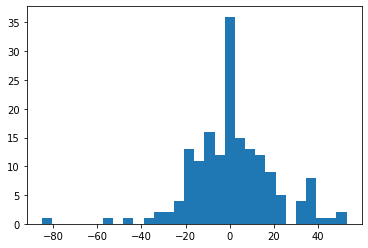

In [29]:
rank_change = pd.DataFrame(df_all_final.groupby('country')['rank'].nth(0) - df_all_final.groupby('country')['rank'].nth(-1))
print('Country that dropped the most in happiness ranking: {}, changed by {}'.format(rank_change.loc[rank_change['rank'].idxmin()].name,
                                                                                    rank_change.loc[rank_change['rank'].idxmin()].values[0]))
print('Country that increased the most in happiness ranking: {}, changed by {}'.format(rank_change.loc[rank_change['rank'].idxmax()].name,
                                                                                      rank_change.loc[rank_change['rank'].idxmax()].values[0]))
plt.hist(rank_change['rank'], bins=30)

score    0.0
Name: Djibouti, dtype: float64
score    2.103
Name: Venezuela, dtype: float64


(array([20., 15., 15., 24., 12., 13., 15., 10.,  8.,  5.,  1.,  7.,  7.,
         5.,  5.,  3.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.    , 0.0701, 0.1402, 0.2103, 0.2804, 0.3505, 0.4206, 0.4907,
        0.5608, 0.6309, 0.701 , 0.7711, 0.8412, 0.9113, 0.9814, 1.0515,
        1.1216, 1.1917, 1.2618, 1.3319, 1.402 , 1.4721, 1.5422, 1.6123,
        1.6824, 1.7525, 1.8226, 1.8927, 1.9628, 2.0329, 2.103 ]),
 <a list of 30 Patch objects>)

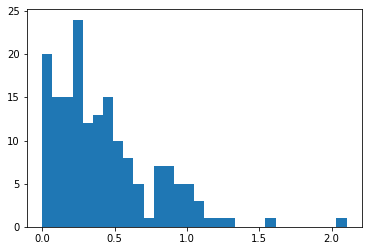

In [30]:
score_change = pd.DataFrame(df_all_final.groupby('country')['score'].max() - df_all_final.groupby('country')['score'].min())

print(score_change.loc[score_change['score'].idxmin()])
print(score_change.loc[score_change['score'].idxmax()])

plt.hist(score_change['score'], bins=30)

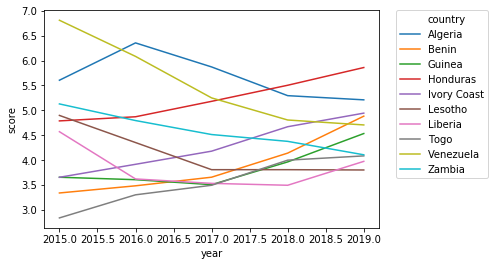

In [31]:
change_top_10 = score_change['score'].nlargest(10).index.values
change_top_10_df = df_all_final.loc[df_all_final['country'].isin(change_top_10)]
sns.lineplot(x='year', y='score', hue='country', data=change_top_10_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [32]:
df_all_final.head()

,country,region,year,rank,score,gdp_pc,family,health,freedom,trust,generosity,dystopia
152,Afghanistan,Southern Asia,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
153,Afghanistan,Southern Asia,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
140,Afghanistan,Southern Asia,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
144,Afghanistan,Southern Asia,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
153,Afghanistan,Southern Asia,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


# HomeWork

In [33]:
df_all_final.describe()

,year,rank,score,gdp_pc,family,health,freedom,trust,generosity,dystopia
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,470.000000
mean,2016.993606,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2.092717
std,1.417364,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,0.565772
min,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2016.000000,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,1.737975
50%,2017.000000,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2.094640
75%,2018.000000,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2.455575
max,2019.000000,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720


In [34]:
df_all_final.dtypes

country        object
region         object
year            int64
rank            int64
score         float64
gdp_pc        float64
family        float64
health        float64
freedom       float64
trust         float64
generosity    float64
dystopia      float64
dtype: object

# What is the corr between gpd and score and country

In [35]:
DATA = df_all_final.groupby(['country','year']).agg({'score':'mean'})
DATA 

score
country     year       
Afghanistan 2015  3.575
            2016  3.360
            2017  3.794
            2018  3.632
            2019  3.203
...                 ...
Zimbabwe    2015  4.610
            2016  4.193
            2017  3.875
            2018  3.692
            2019  3.663

[782 rows x 1 columns]

  # List top 3 years for each country have the highest average score

In [36]:
top3 = DATA.sort_values(by=['country','year'],ascending=[True,False]).groupby('country').head(3)
top3

score
country     year       
Afghanistan 2019  3.203
            2018  3.632
            2017  3.794
Albania     2019  4.719
            2018  4.586
...                 ...
Zambia      2018  4.377
            2017  4.514
Zimbabwe    2019  3.663
            2018  3.692
            2017  3.875

[488 rows x 1 columns]

# How the average scores changes ?

In [56]:
year_avg = df_all_final.groupby(['region','year']).mean().reset_index()
year_avg.head()

,region,year,rank,score,gdp_pc,family,health,freedom,trust,generosity,dystopia
0,Australia and New Zealand,2015,9.5,7.2850,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
1,Australia and New Zealand,2016,8.5,7.3235,1.402545,1.138770,0.841080,0.574920,0.371175,0.484040,2.511015
2,Australia and New Zealand,2017,9.0,7.2990,1.445060,1.529119,0.830323,0.607835,0.342000,0.488852,2.055834
3,Australia and New Zealand,2018,9.0,7.2980,1.304000,1.587000,0.893000,0.658000,0.345500,0.363000,NaN
4,Australia and New Zealand,2019,9.5,7.2675,1.337500,1.552500,1.031000,0.571000,0.335000,0.331000,NaN


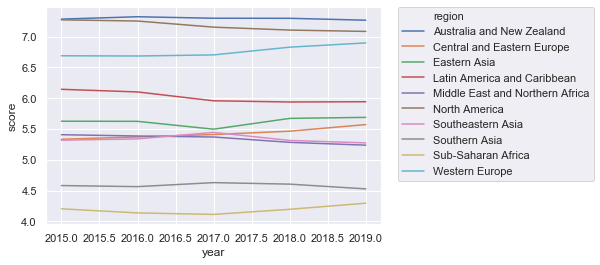

In [61]:
sns.set(style="darkgrid")
sns.lineplot(x='year',y='score',hue='region',data=year_avg)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

In [80]:
min_country = df_all_final.groupby('country').mean().sort_values(by='score').reset_index().iloc[0]['country']

In [81]:
max_country = df_all_final.groupby('country').mean().sort_values(by='score',ascending=False).reset_index().iloc[0]['country']

In [82]:
country_sub = df_all_final[(df_all_final['country']== min_country) | (df_all_final['country']== max_country)]

In [83]:
country_sub

,country,region,year,rank,score,gdp_pc,family,health,freedom,trust,generosity,dystopia
156,Burundi,Sub-Saharan Africa,2015,157,2.905,0.015300,0.415870,0.223960,0.118500,0.100620,0.197270,1.833020
156,Burundi,Sub-Saharan Africa,2016,157,2.905,0.068310,0.234420,0.157470,0.043200,0.094190,0.202900,2.104040
153,Burundi,Sub-Saharan Africa,2017,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024
155,Burundi,Sub-Saharan Africa,2018,156,2.905,0.091000,0.627000,0.145000,0.065000,0.076000,0.149000,NaN
144,Burundi,Sub-Saharan Africa,2019,145,3.775,0.046000,0.447000,0.380000,0.220000,0.180000,0.176000,NaN
2,Denmark,Western Europe,2015,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
0,Denmark,Western Europe,2016,1,7.526,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2.739390
1,Denmark,Western Europe,2017,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
2,Denmark,Western Europe,2018,3,7.555,1.351000,1.590000,0.868000,0.683000,0.408000,0.284000,NaN
1,Denmark,Western Europe,2019,2,7.600,1.383000,1.573000,0.996000,0.592000,0.410000,0.252000,NaN


In [ ]:
sns.pairplot(country_sub[features+targets+['']])